# ++++++++++Process Flow++++++++++

# APPLICATION CREATION PROCESS AFTER CREATING OUR MODEL

# INSTALLING AND IMPORTING DEPENDENCIES

In [42]:
!pip install -Uqq fastbook fastai duckduckgo_search

In [49]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 40.3 MB/s eta 0:00:0000:0100:01
Config option `kernel_spec_manager_class` not recognized by `EnableServerExtensionApp`.
Enabling: voila
- Writing config: /opt/conda/etc/jupyter
    - Validating...
      voila 0.5.7 OK


In [43]:
from fastbook import *
from fastai.vision.widgets import *
from duckduckgo_search import DDGS

# LOADING OUR MODEL

In [3]:
model_path = '/kaggle/input/bears-model-try-2-bears/other/default/1/bears_model.pkl'
model_inference = load_learner(model_path)

# ADDING THE APPLICATION ELEMENTS

# File Upload Button to select the image input

In [4]:
# btn_upload = widgets.FileUpload()
# btn_upload

FileUpload(value={}, description='Upload')

# Displaying the input image

Using **PILImage.create(**\<image-data>**)**

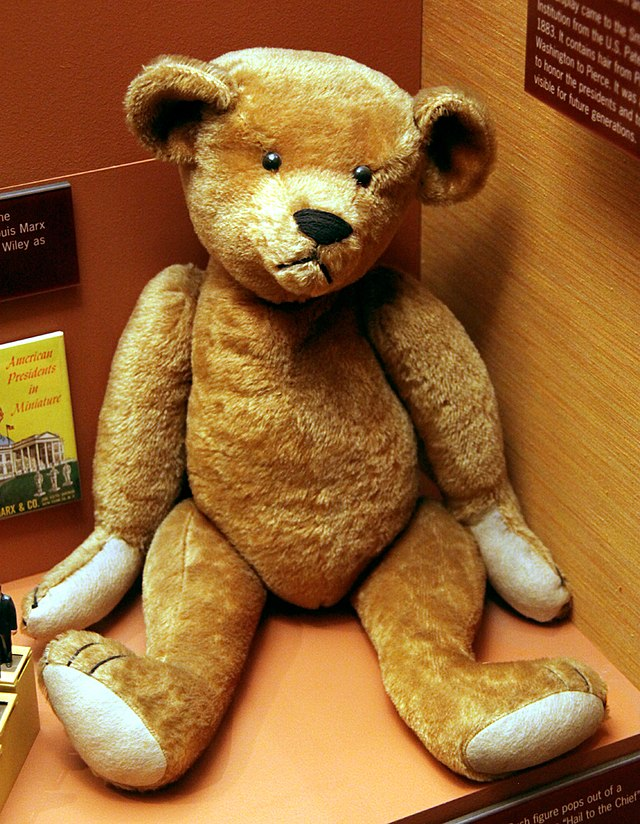

In [20]:
img = PILImage.create(btn_upload.data[-1])
img

Using **widgets.Output()**

In [44]:
out_img = widgets.Output()
out_img.clear_output()

with out_img:
    display(img.to_thumb(128,128))

out_img

Output()

# +++++TRYING TO MAKE PREDICTION+++++

In [22]:
prediction, index, probability = model_inference.predict(img)

# Label

Using **widgets.Label()**

In [23]:
label_display = widgets.Label()
label_display.value = f"Prediction: {prediction} | Probability: {probability[index]}"
label_display

Label(value='Prediction: teddy | Probability: 1.0')

# Generic Button (to be used with Event Handler)

We'll be using a function (def) to command what the Button will do

In [24]:
btn_classify = widgets.Button(description='CLASSIFY')
btn_classify

Button(description='CLASSIFY', style=ButtonStyle())

**FUNCTION**

In [38]:
btn_upload1 = widgets.FileUpload()

In [46]:
def click_classify(change):
    image = PILImage.create(btn_upload1.data[-1])
    out_img.clear_output()
    
    with out_img:
        display(image.to_thumb(128,128))

    prediction, index, probability = model_inference.predict(image)
    
    label_display.value = f"PREDICTION: {prediction} | PROBABILITY: {probability[index]:.04f}"

**APPLYING THE FUNCTION TO OUR GENERIC BUTTON**

In [47]:
btn_classify.on_click(click_classify)

# CREATING THE USER INTERFACE 
Using **VBox([**\<elements>**])**

In [48]:
VBox([
    widgets.Label('SELECT YOUR BEAR'),
    btn_upload1,
    btn_classify,
    out_img,
    label_display
])